In [40]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("phyloseq")
# BiocManager::install("microbiome")
library(phyloseq)
library(ggplot2)
library(microbiome)

In [2]:
load("../02-diversity_analyses/.RData")
ps.dat.noUS

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2975 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 2975 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2975 tips and 2974 internal nodes ]

[1] "mean number of ASVs per tooth: 106"

[1] "standard deviation: 54"

[1] "maximum number of ASVs: 339"

[1] "mininum number of ASVs: 9"

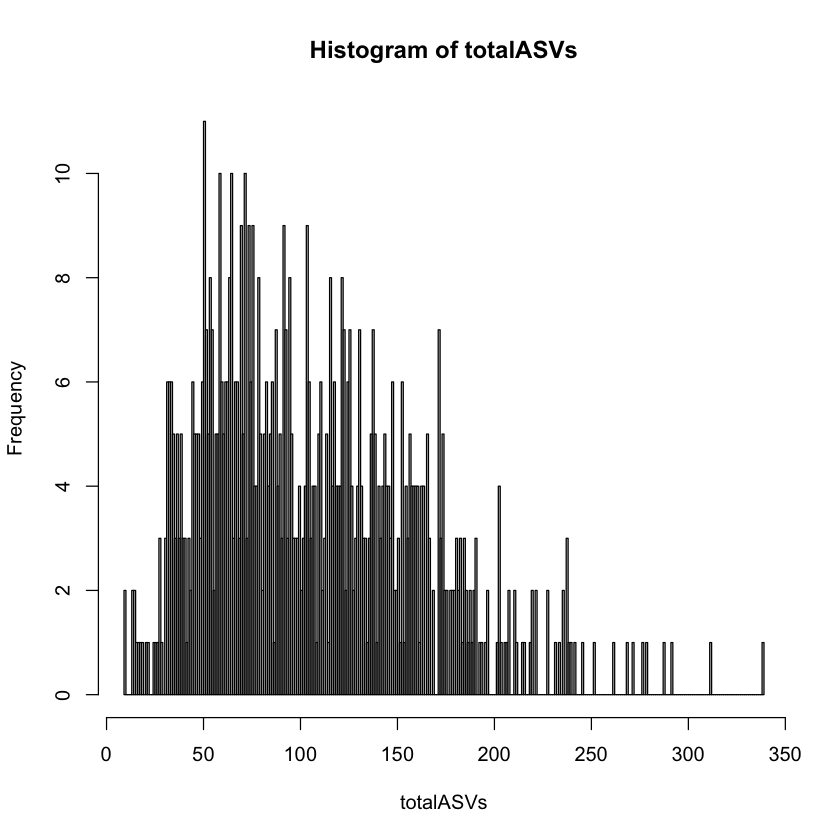

In [3]:
system("mkdir img")
# first get the total number of ASVs found across tooth samples
temp <- as.data.frame(otu_table(ps.dat.noUS))
temp[temp>0] <- 1
totalASVs <- rowSums(temp)
paste("mean number of ASVs per tooth:", round(mean(totalASVs), digits=0))
paste("standard deviation:", round(sd(totalASVs), digits=0))
paste("maximum number of ASVs:", max(totalASVs))
paste("mininum number of ASVs:", min(totalASVs))
hist(totalASVs, breaks=350)

pdf 
  2

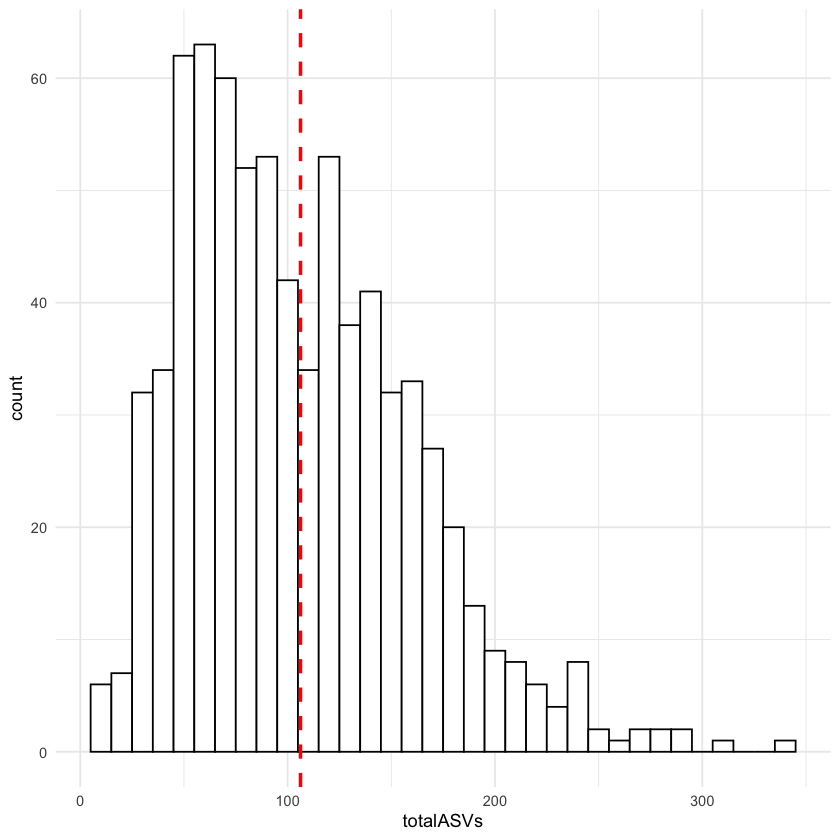

In [11]:
system("mkdir img")
# cleaned up histogram
pdf("img/totalASVs_hist.pdf")
ggplot(as.data.frame(totalASVs), aes(x=totalASVs)) + geom_histogram(color="black", fill="white", binwidth = 10) + geom_vline(aes(xintercept=mean(totalASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(totalASVs), aes(x=totalASVs)) + geom_histogram(color="black", fill="white", binwidth = 10) + geom_vline(aes(xintercept=mean(totalASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 13 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 13 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 13 tips and 12 internal nodes ]

[1] "mean number of ASVs per tooth: 1"

[1] "standard deviation: 1"

[1] "maximum number of ASVs: 8"

[1] "mininum number of ASVs: 0"

pdf 
  2

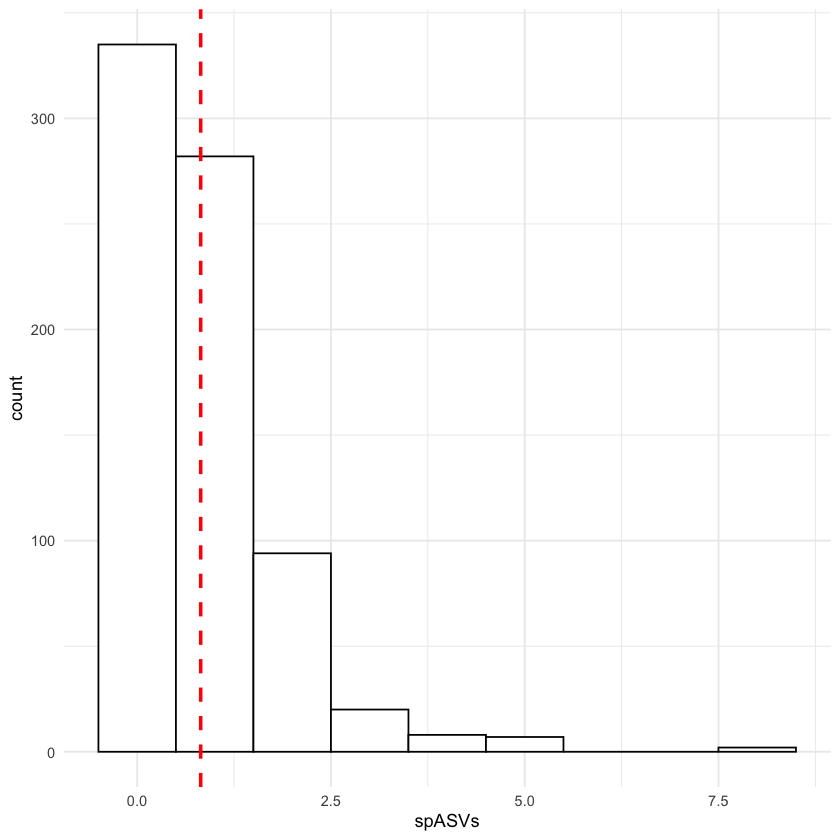

In [108]:
# number of ASVs in a single tooth within a single species
sp.dat <- subset_taxa(ps.dat.noUS, V9 == "Lachnospiraceae_bacterium_oral_taxon_096")
sp.dat
sp.df <- as.data.frame(otu_table(sp.dat))
sp.df[sp.df>0] <- 1
spASVs <- rowSums(sp.df)
paste("mean number of ASVs per tooth:", round(mean(spASVs), digits=0))
paste("standard deviation:", round(sd(spASVs), digits=0))
paste("maximum number of ASVs:", max(spASVs))
paste("mininum number of ASVs:", min(spASVs))
pdf("img/spASVs_hist.pdf")
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


pdf 
  2

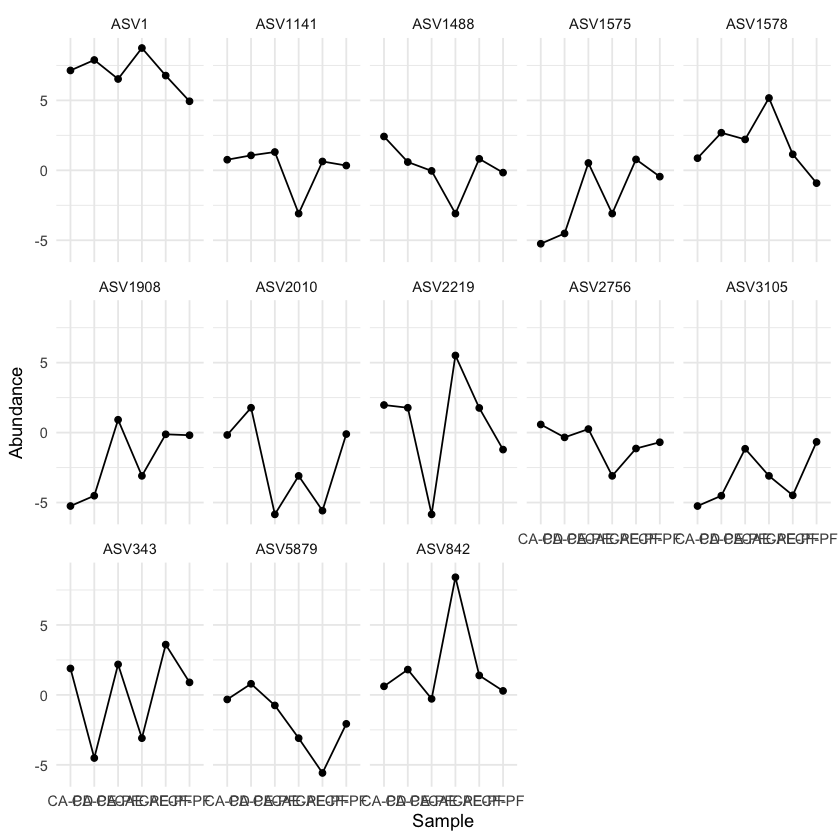

In [115]:
merged <- merge_samples(sp.dat, "aliquot_type")
merged <- prune_taxa(taxa_sums(merged) > 0, merged)
merged <- transform(merged, "clr")
datmelt <- psmelt(merged)
pdf("img/spASV_linegraph.pdf")
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()
dev.off()
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 748 samples ]
sample_data() Sample Data:       [ 748 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 11 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5 tips and 4 internal nodes ]

[1] "mean number of ASVs per tooth: 0"

[1] "standard deviation: 1"

[1] "maximum number of ASVs: 5"

[1] "mininum number of ASVs: 0"

pdf 
  2

Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”
Warning message in asMethod(object):
“NAs introduced by coercion”


pdf 
  2

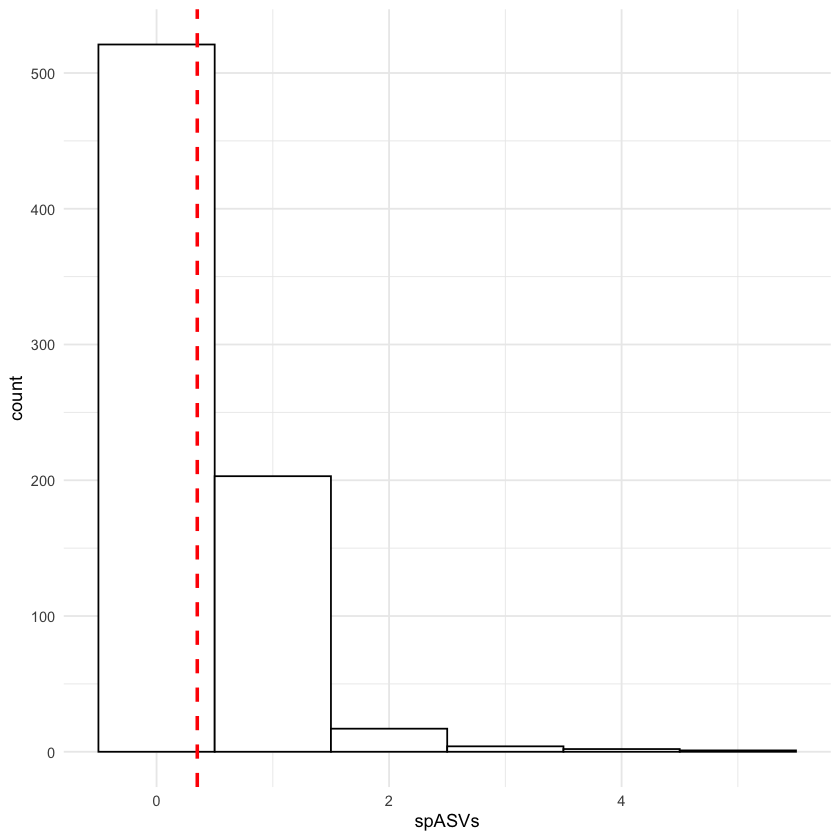

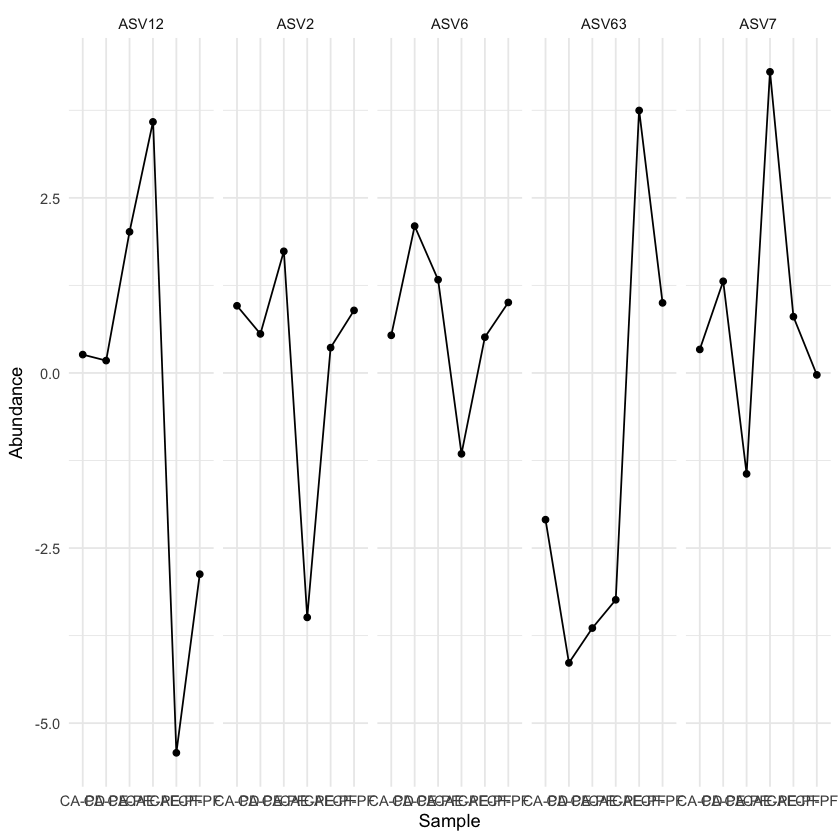

In [126]:
# number of ASVs in a single tooth within a single species
sp.dat <- subset_taxa(ps.dat.noUS, V9 == "Streptococcus_mutans")
sp.dat
sp.df <- as.data.frame(otu_table(sp.dat))
sp.df[sp.df>0] <- 1
spASVs <- rowSums(sp.df)
paste("mean number of ASVs per tooth:", round(mean(spASVs), digits=0))
paste("standard deviation:", round(sd(spASVs), digits=0))
paste("maximum number of ASVs:", max(spASVs))
paste("mininum number of ASVs:", min(spASVs))
pdf("img/Smutans_spASVs_hist.pdf")
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()
dev.off()
ggplot(as.data.frame(spASVs), aes(x=spASVs)) + geom_histogram(color="black", fill="white", binwidth = 1) + geom_vline(aes(xintercept=mean(spASVs)), color="red", linetype="dashed", size=1) + theme_minimal()

merged <- merge_samples(sp.dat, "aliquot_type")
merged <- prune_taxa(taxa_sums(merged) > 0, merged)
merged <- transform(merged, "clr")
datmelt <- psmelt(merged)
pdf("img/Smutans_spASV_linegraph.pdf")
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()
dev.off()
ggplot(datmelt, aes(Sample, Abundance)) + geom_line(group=1) + geom_point() + facet_wrap( ~ OTU, ncol =5) + theme_minimal()

pdf 
  2

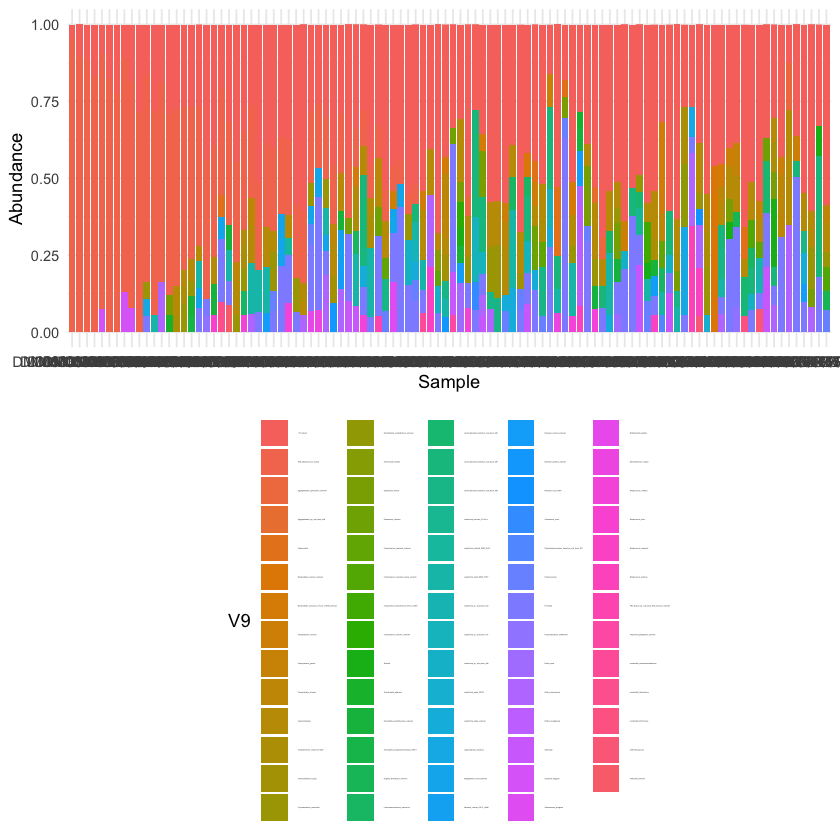

In [120]:
sub.ps.dat <- subset_samples(ps.dat.noUS, aliquot_type == "CA-PD")
glom <- tax_glom(sub.ps.dat, taxrank="V9") 
glom <- transform_sample_counts(glom, function(x)x/sum(x))
data <- psmelt(glom)
data$V9 <- as.character(data$V9)
write.table(data, "strep_abund.txt", sep="\t")
data <- read.table("strep_abund_sort.txt", sep="\t", header=T)
data$V9[data$Abundance < 0.05] <- "< 5% abund"
data$Sample <- factor(data$Sample, levels = unique(data$Sample))

pdf("img/capd_strep_taxbar.pdf")
ggplot(data, aes(x=Sample, y=Abundance, fill=V9)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(legend.position = "bottom", legend.text=element_text(size=1))
dev.off()
ggplot(data, aes(x=Sample, y=Abundance, fill=V9)) + geom_bar(aes(), stat="identity", position="stack") + theme_minimal() + theme(legend.position = "bottom", legend.text=element_text(size=1))